# 1- Imorting Libiraries

In [1]:
## To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Basic Data Proccessing & Visualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 2- Data Gathering

### DataSet Fetching

In [2]:
## Main DataSet
students_df = pd.read_csv('/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv')

## Copy Of DataSet
copy_df = students_df.copy()

In [ ]:
## Change 'Unnamed: 0' Column to 'ID'
students_df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

### DataSet Display (Samples)

In [4]:
## Display the few rows of the training dataset
students_df.sample(10)

,ID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
11276,953,female,group C,associate's degree,standard,none,single,sometimes,yes,3.0,private,< 5,45,60,52
25401,81,male,group B,associate's degree,standard,none,married,regularly,no,3.0,school_bus,5 - 10,83,81,84
5621,924,female,group D,some high school,standard,none,single,regularly,no,1.0,private,5 - 10,72,69,75
24527,138,male,group D,high school,standard,none,single,regularly,yes,1.0,NaN,> 10,93,89,82
27893,759,female,group C,high school,standard,none,married,sometimes,yes,0.0,private,5 - 10,19,44,41
6695,71,male,group B,some college,standard,completed,single,sometimes,yes,3.0,school_bus,5 - 10,87,83,82
9027,552,male,group C,high school,standard,none,divorced,sometimes,yes,1.0,school_bus,NaN,86,84,84
27026,824,female,group A,bachelor's degree,standard,none,divorced,regularly,yes,3.0,school_bus,5 - 10,55,72,76
16054,61,female,group C,some college,standard,none,single,sometimes,yes,4.0,private,> 10,82,97,85
6904,297,male,group E,associate's degree,standard,completed,married,sometimes,yes,2.0,NaN,< 5,87,84,81


In [5]:
## DataSet Features
students_df.columns

Index(['ID', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

# 3- Data Preperation

### Display Not-Nulls Count & Data Type

In [6]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### Display Data Satistics

In [7]:
students_df.describe(include='object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


### Display Data Missing Values

In [8]:
# Check for missing values in the dataset
students_df.isnull().sum()

ID                        0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Display Data Duplicates

In [9]:
## Check for duplicate rows in the dataset
students_df.duplicated().sum()

0

### Visual Display of Data

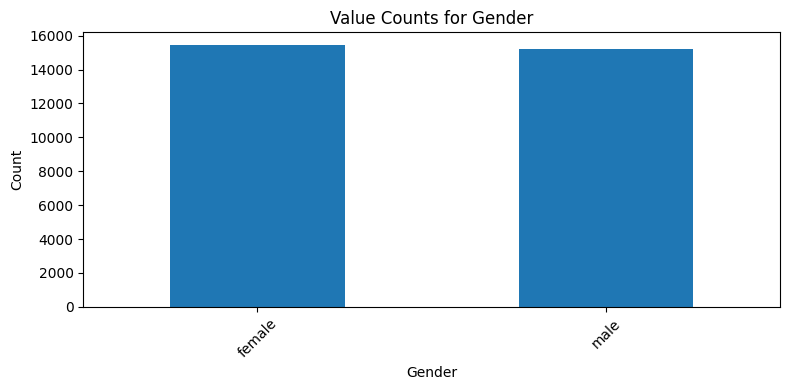

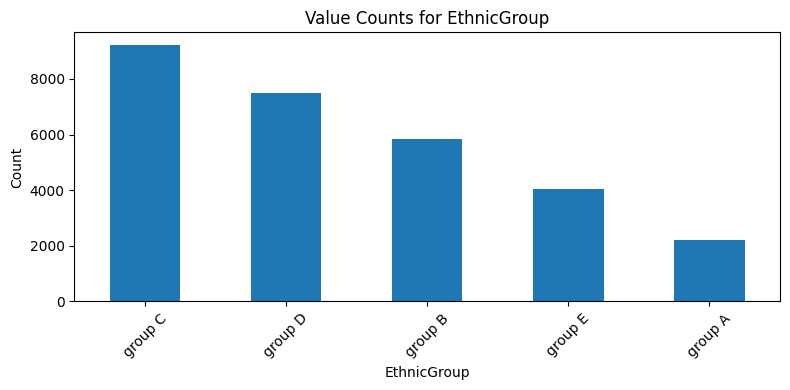

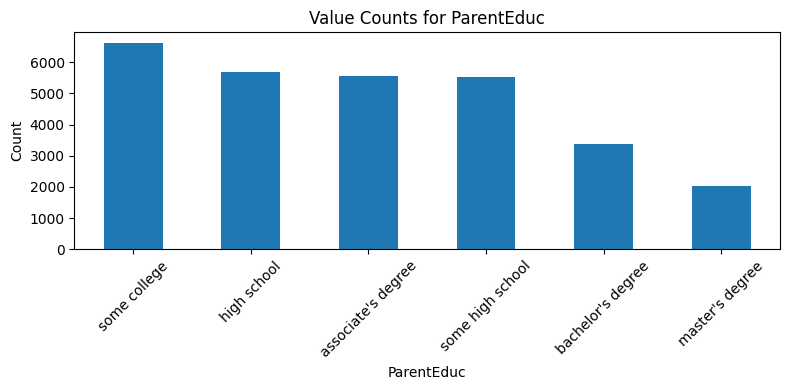

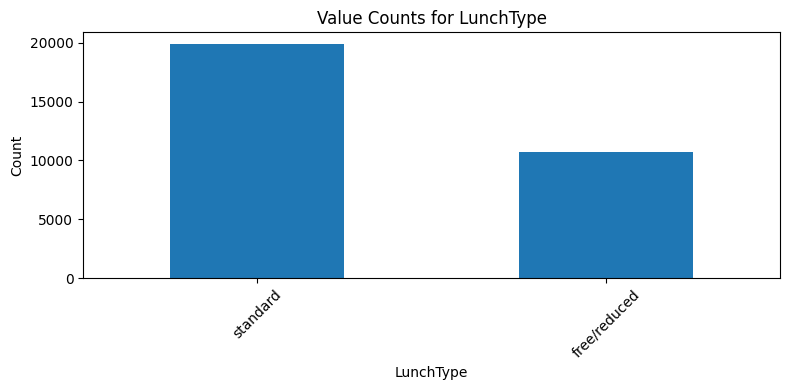

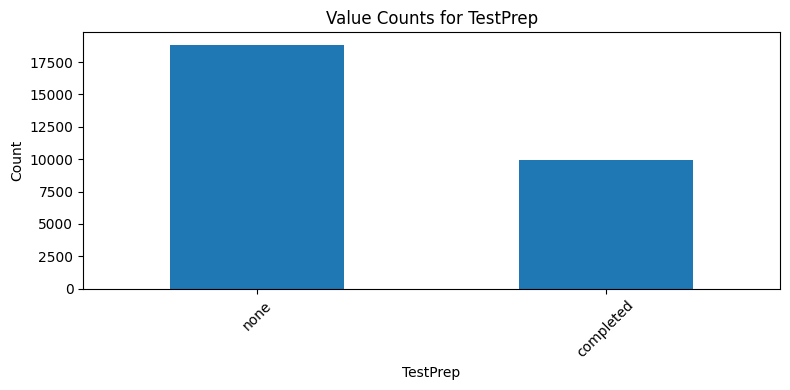

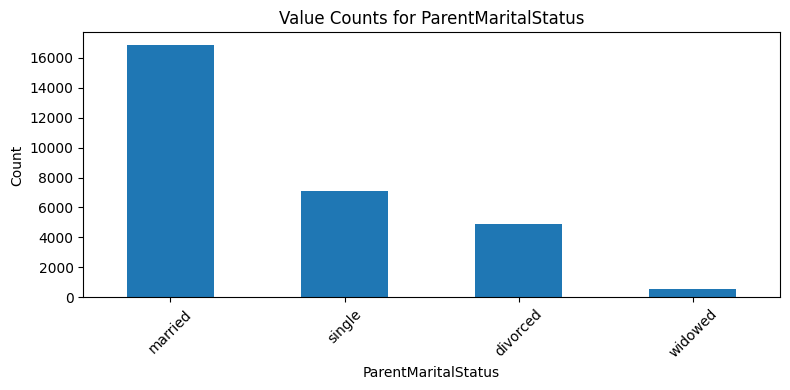

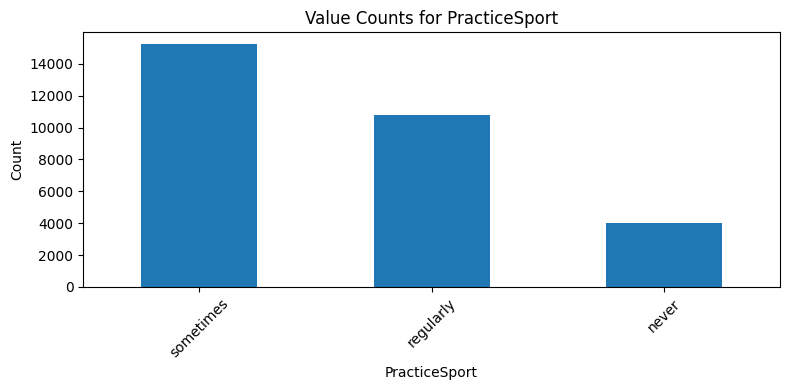

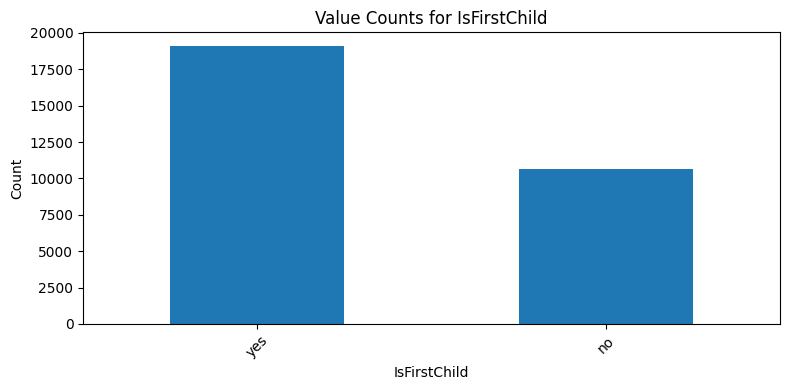

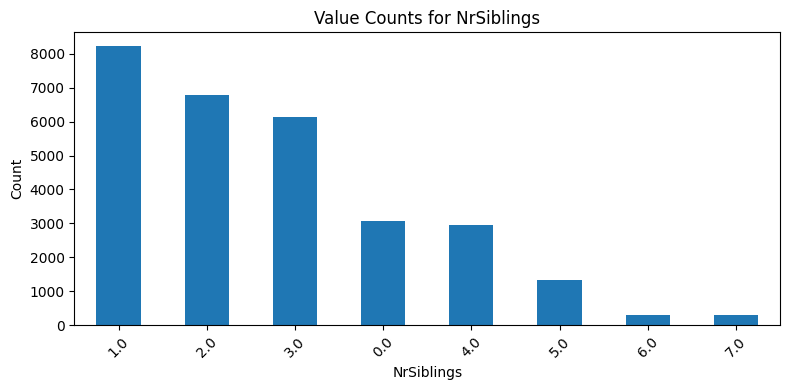

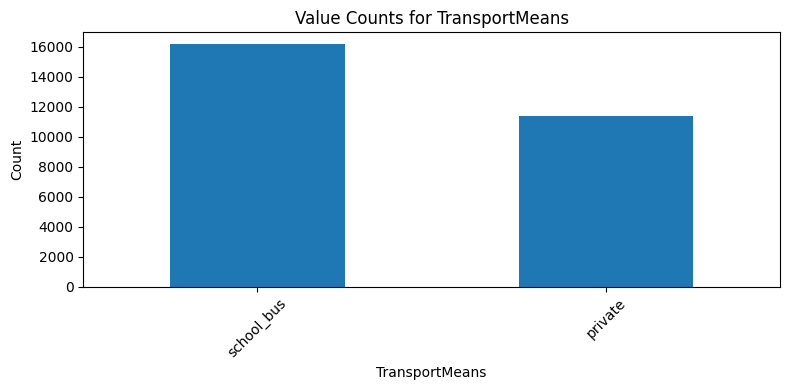

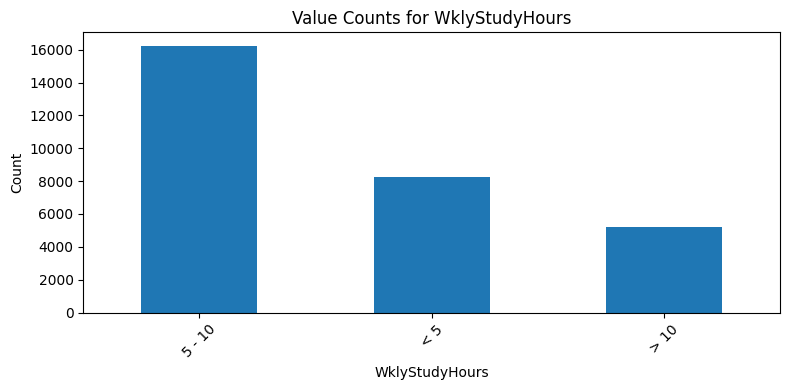

In [10]:
# Choose specific columns to display
selected_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']

for column in selected_columns:
    if column in students_df.columns:
        plt.figure(figsize=(8, 4))
        students_df[column].dropna().value_counts().plot(kind='bar')
        plt.title(f"Value Counts for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### Data Analysis

#### 1. `'ID'` is Usless so we will drop it
#### 2. `'NrSiblings'` have alot of categoreis and some nulls so we will drop it
#### 3. `'Gender'`, `'LunchType'` are Object so we will encode it to Binary
#### 3. `'IsFirstChild'`, `'TransportMeans'`, `'TestPrep'` are Object so we will encode it to Binary and have some nulls so we will fill it
#### 4. `'EthnicGroup'`, `'ParentEduc'`, `'ParentMaritalStatus'`, `'WklyStudyHours', 'PracticeSportp'` are Object so we will encode it and have some nulls so we will fill it
#### 5. `'WritingScore'`, `'ReadingScore'`, `'MathScore'` are targets

# 4- Data Wrangling

### Dropping Usless Features

In [11]:
## Drop the 'Unnamed: 0' column due to a high percentage of Unique values
copy_df.drop(columns = ['Unnamed: 0','NrSiblings'],inplace = True)

In [12]:
# Check for Duplicate rows after Dropping
print("Number of duplicate rows:", copy_df.duplicated().sum())

Number of duplicate rows: 0


There is still no Duplicates after Dropping

### Encoding `'Gender'`,`'LunchType'`

In [13]:
copy_df['Gender'].replace({'male':1,'female':0}, inplace= True)
copy_df['LunchType'].replace({'standard':1,'free/reduced':0}, inplace= True)

### Filling Null Values in Features

In [14]:
# specify your columns
columns_to_fill = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

for col in columns_to_fill:
    copy_df[col].fillna(copy_df[col].mode()[0], inplace=True)

### Encoding `'IsFirstChild'`, `'TransportMeans'`, `'TestPrep'` With Binary Values

In [15]:
copy_df['TestPrep'].replace({'completed':1,'none':0}, inplace= True)
copy_df['IsFirstChild'].replace({'yes':1,'no':0}, inplace= True)
copy_df['TransportMeans'].replace({'private':1,'school_bus':0}, inplace= True)

### Encoding The Rest of Features With Diffrent Values

In [16]:
## Drop rows where ParentMaritalStatus is 'widowed'
copy_df = copy_df[copy_df['ParentMaritalStatus'] != 'widowed']

In [17]:
copy_df['EthnicGroup'].replace({'group A':0,'group B':1,'group C':2,'group D':3,'group E':4}, inplace= True)
copy_df['ParentEduc'].replace({"master's degree":0,"bachelor's degree":1,'some high school':2,"associate's degree":3,'high school':4,'some college':5}, inplace= True)
copy_df['ParentMaritalStatus'].replace({'married':0,'single':1,'divorced':2}, inplace= True)
copy_df['PracticeSport'].replace({'never':0,'regularly':1,'sometimes':2}, inplace= True)
copy_df['WklyStudyHours'].replace({'> 10':0,'< 5':1,'5 - 10':2}, inplace= True)

### Verifying the Cleaning Process

In [18]:
copy_df.sample(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
11535,1,2,3,1,1,0,2,1,1,0,72,82,83
2347,1,3,1,1,0,0,1,1,0,2,72,71,74
25281,1,3,2,1,0,0,2,1,1,2,57,54,48
2560,0,2,0,1,0,2,1,1,1,2,44,66,67
2396,1,3,5,1,0,0,2,1,0,2,73,60,62
12220,1,1,4,0,0,1,2,1,0,2,58,57,51
6541,0,4,5,1,1,0,1,1,0,2,85,88,99
9815,0,2,1,1,0,0,2,0,1,1,66,72,80
6830,1,4,3,0,0,2,2,1,0,1,70,60,58
13878,0,2,5,1,0,0,0,1,0,2,39,55,41


In [19]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30050 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               30050 non-null  int64
 1   EthnicGroup          30050 non-null  int64
 2   ParentEduc           30050 non-null  int64
 3   LunchType            30050 non-null  int64
 4   TestPrep             30050 non-null  int64
 5   ParentMaritalStatus  30050 non-null  int64
 6   PracticeSport        30050 non-null  int64
 7   IsFirstChild         30050 non-null  int64
 8   TransportMeans       30050 non-null  int64
 9   WklyStudyHours       30050 non-null  int64
 10  MathScore            30050 non-null  int64
 11  ReadingScore         30050 non-null  int64
 12  WritingScore         30050 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


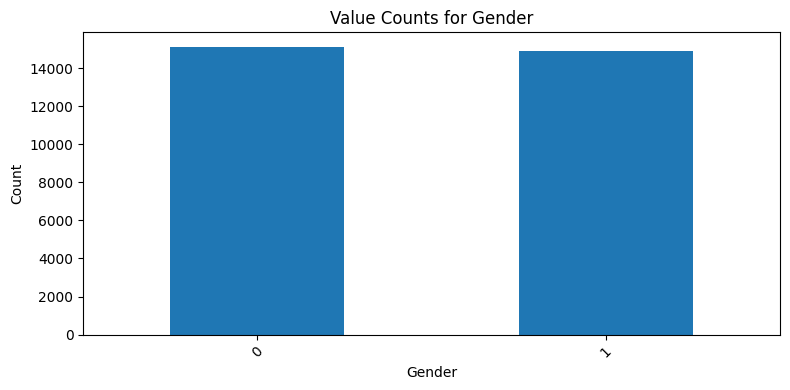

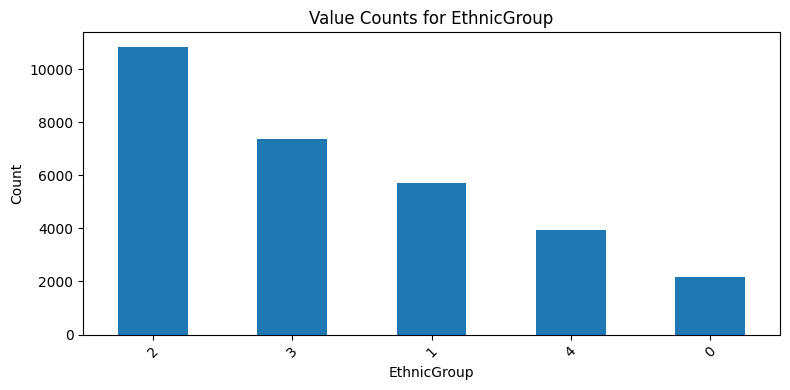

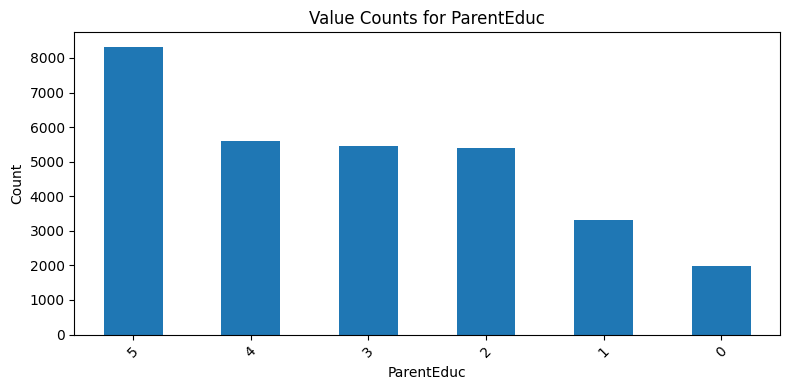

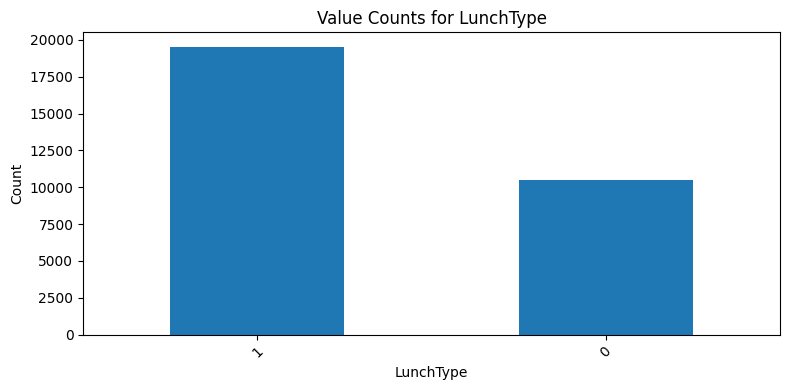

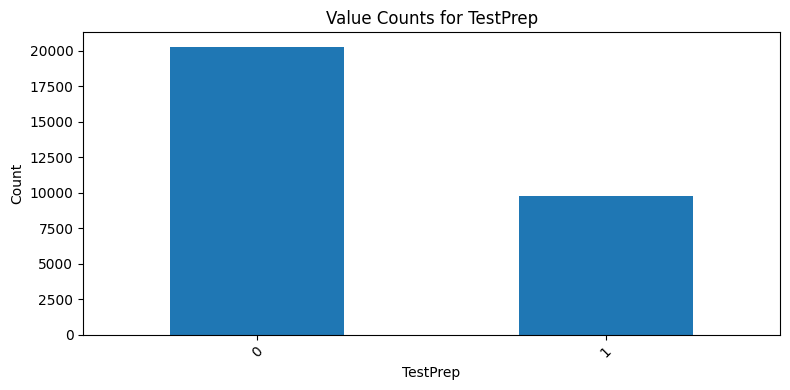

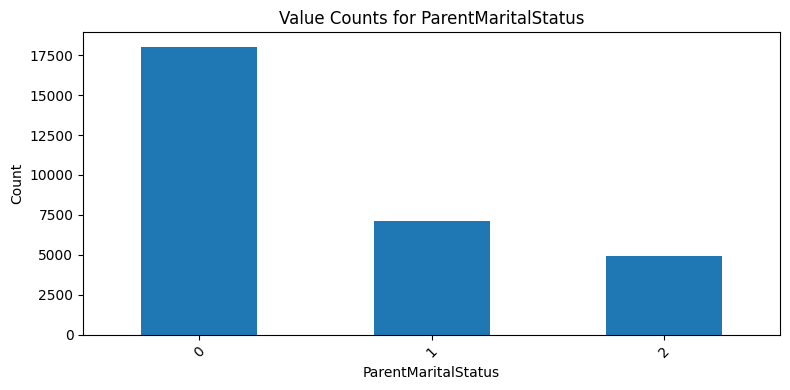

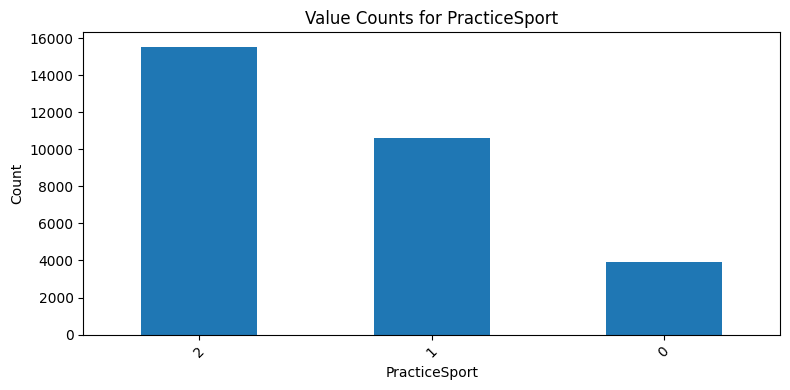

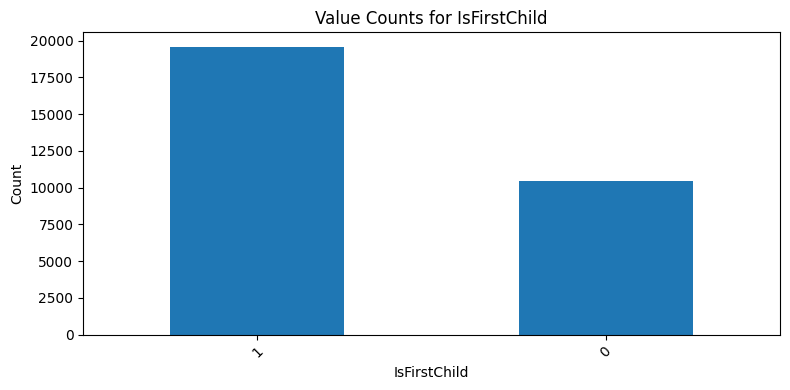

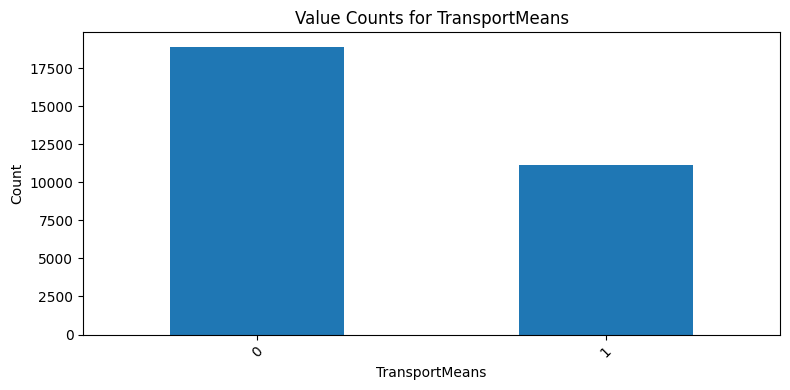

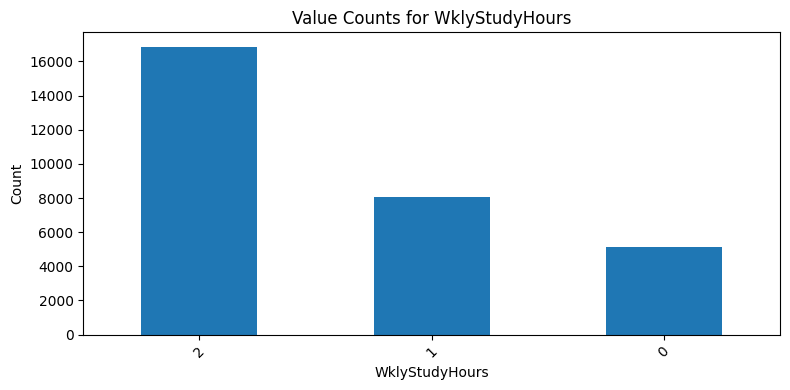

In [20]:
# Choose specific columns to display
selected_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours']

for column in selected_columns:
    if column in copy_df.columns:
        plt.figure(figsize=(8, 4))
        copy_df[column].dropna().value_counts().plot(kind='bar')
        plt.title(f"Value Counts for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 5- Data Modeling

### 1. Model Of Math 

#### Split The Data 

In [21]:
X_math = copy_df.drop(columns = ['MathScore'])
y_math = copy_df['MathScore']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_math, y_math, test_size=0.2, shuffle= True)

#### Training The Models

In [22]:
linearRegressionForMath = LinearRegression()
linearRegressionForMath.fit(X_train_m, y_train_m)

LinearRegression()

#### Evaluate The Models

##### For Train Phase

In [23]:
## Make predictions
y_pred_train_m = linearRegressionForMath.predict(X_train_m)

## Evaluate metrics
accuracyTrainForMath = linearRegressionForMath.score(X_train_m, y_train_m)
mean_absolute_m = mean_absolute_error(y_train_m, y_pred_train_m)
mean_squared_m = mean_squared_error(y_train_m, y_pred_train_m)
r2_m = r2_score(y_train_m, y_pred_train_m)

In [24]:
print(f'Train Accuracy For Math : {round(accuracyTrainForMath*100, 2)}\nAbsolute Mean For Math : {round(mean_absolute_m*100, 2)}\nSquared Mean : {round(mean_squared_m*100, 2)}\nR2 For Math : {round(r2_m*100, 2)}')

Train Accuracy For Mtah : 86.43
Absolute Mean For Math : 452.7
Squared Mean : 3203.0
R2 For Math : 86.43


##### For Test Phase

In [25]:
## Make predictions
y_pred_test_m = linearRegressionForMath.predict(X_test_m)

## Evaluate metrics
accuracyTestMath = linearRegressionForMath.score(X_test_m, y_test_m)
mean_absolute_m = mean_absolute_error(y_test_m, y_pred_test_m)
mean_squared_m = mean_squared_error(y_test_m, y_pred_test_m)
r2_m = r2_score(y_test_m, y_pred_test_m)

In [26]:
print(f'Test Accuracy For Math : {round(accuracyTestMath*100, 2)}\nAbsolute Mean For Math : {round(mean_absolute_m*100, 2)}\nSquared Mean For Math : {round(mean_squared_m*100, 2)}\nR2 For Math : {round(r2_m*100, 2)}')

Test Accuracy For Math : 86.18
Absolute Mean For Math : 455.43
Squared Mean For Math : 3248.91
R2 For Math : 86.18


### Saving The Math Model

In [27]:
import pickle

with open('linearRegressionForMath.pkl', 'wb') as file:
    pickle.dump(linearRegressionForMath, file)

print("Model saved as 'linearRegressionForMath.pkl'")

Model saved as 'linearRegressionForMath.pkl'


### 2. Model Of Reading

#### Split The Data 

In [28]:
X_reading = copy_df.drop(columns = ['ReadingScore'])
y_reading = copy_df['ReadingScore']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reading, y_reading, test_size=0.2, shuffle= True)

#### Training The Models

In [29]:
linearRegressionForReading = LinearRegression()
linearRegressionForReading.fit(X_train_r, y_train_r)

LinearRegression()

#### Evaluate The Models

##### For Train Phase

In [30]:
## Make predictions
y_pred_train_r = linearRegressionForReading.predict(X_train_r)

## Evaluate metrics
accuracyTrainReading = linearRegressionForReading.score(X_train_r, y_train_r)
mean_absolute_r = mean_absolute_error(y_train_r, y_pred_train_r)
mean_squared_r = mean_squared_error(y_train_r, y_pred_train_r)
r2_r = r2_score(y_train_r, y_pred_train_r)

In [31]:
print(f'Train Accuracy For Reading : {round(accuracyTrainReading*100, 2)}\nAbsolute Mean For Reading : {round(mean_absolute_r*100, 2)}\nSquared Mean For Reading : {round(mean_squared_r*100, 2)}\nR2 For Reading : {round(r2_r*100, 2)}')

Train Accuracy For Reading : 91.91
Absolute Mean For Reading : 336.64
Squared Mean For Reading : 1759.71
R2 For Reading : 91.91


##### For Test Phase

In [32]:
## Make predictions
y_pred_test_r = linearRegressionForReading.predict(X_test_r)

## Evaluate metrics
accuracyTestReading = linearRegressionForReading.score(X_test_r, y_test_r)
mean_absolute_r = mean_absolute_error(y_test_r, y_pred_test_r)
mean_squared_r = mean_squared_error(y_test_r, y_pred_test_r)
r2_r = r2_score(y_test_r, y_pred_test_r)

In [33]:
print(f'Test Accuracy For Reading : {round(accuracyTestReading*100, 2)}\nAbsolute Mean For Reading : {round(mean_absolute_r*100, 2)}\nSquared Mean For Reading : {round(mean_squared_r*100, 2)}\nR2 For Reading : {round(r2_r*100, 2)}')

Test Accuracy For Reading : 92.0
Absolute Mean For Reading : 336.02
Squared Mean For Reading : 1753.19
R2 For Reading : 92.0


### Saving The Reading Model

In [34]:
import pickle

with open('linearRegressionForReading.pkl', 'wb') as file:
    pickle.dump(linearRegressionForReading, file)

print("Model saved as 'linearRegressionForReading.pkl'")

Model saved as 'linearRegressionForReading.pkl'


### 3. Model Of Writing 

#### Split The Data 

In [35]:
X_writing = copy_df.drop(columns = ['WritingScore'])
y_writing = copy_df['WritingScore']


X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_writing, y_writing, test_size=0.2, shuffle= True)

#### Training The Models

In [36]:
linearRegressionForWriting = LinearRegression()
linearRegressionForWriting.fit(X_train_w, y_train_w)

LinearRegression()

#### Evaluate The Models

##### For Train Phase

In [37]:
## Make predictions
y_pred_train_w = linearRegressionForWriting.predict(X_train_w)

## Evaluate metrics
accuracyTrainWriting = linearRegressionForWriting.score(X_train_w, y_train_w)
mean_absolute_w = mean_absolute_error(y_train_w, y_pred_train_w)
mean_squared_w = mean_squared_error(y_train_w, y_pred_train_w)
r2_w = r2_score(y_train_w, y_pred_train_w)

In [38]:
print(f'Train Accuracy For Writing : {round(accuracyTrainWriting*100, 2)}\nAbsolute Mean For Writing : {round(mean_absolute_w*100, 2)}\nSquared Mean For Writing : {round(mean_squared_w*100, 2)}\nR2 For Writing : {round(r2_w*100, 2)}')

Train Accuracy For Writing : 93.75
Absolute Mean For Writing : 307.76
Squared Mean For Writing : 1485.1
R2 For Writing : 93.75


##### For Test Phase

In [39]:
## Make predictions
y_pred_test_w = linearRegressionForWriting.predict(X_test_w)

## Evaluate metrics
accuracyTestWriting = linearRegressionForWriting.score(X_test_w, y_test_w)
mean_absolute_w = mean_absolute_error(y_test_w, y_pred_test_w)
mean_squared_w = mean_squared_error(y_test_w, y_pred_test_w)
r2_w = r2_score(y_test_w, y_pred_test_w)

In [40]:
print(f'Test Accuracy For Writing : {round(accuracyTestWriting*100, 2)}\nAbsolute Mean For Writing : {round(mean_absolute_w*100, 2)}\nSquared Mean For Writing : {round(mean_squared_w*100, 2)}\nR2 For Writing : {round(r2_w*100, 2)}')

Test Accuracy For Writing : 93.58
Absolute Mean For Writing : 315.38
Squared Mean For Writing : 1555.98
R2 For Writing : 93.58


### Saving The Writing Model

In [41]:
import pickle

with open('linearRegressionForWriting.pkl', 'wb') as file:
    pickle.dump(linearRegressionForWriting, file)

print("Model saved as 'linearRegressionForWriting.pkl'")

Model saved as 'linearRegressionForWriting.pkl'


In [42]:
v1 = X_train_m.iloc[3]

In [43]:
v1

Gender                  1
EthnicGroup             1
ParentEduc              5
LunchType               1
TestPrep                0
ParentMaritalStatus     0
PracticeSport           2
IsFirstChild            0
TransportMeans          1
WklyStudyHours          0
ReadingScore           70
WritingScore           62
Name: 16701, dtype: int64

In [44]:
v1 = np.array(v1).reshape(1, -1)

In [45]:
v1

array([[ 1,  1,  5,  1,  0,  0,  2,  0,  1,  0, 70, 62]])

In [46]:
linearRegressionForMath.predict(v1)

array([70.75124724])